# Transformada Rápida de Fourier e a sua Inversa em Python 3
---
# Sumário
<html>
<body>
<ul>
    <li><a href="#1.-Introdução-Histórica">1. Introdução Histórica</a></li>
</ul>
<ul>
    <li><a href="#2.-Transformada-Discreta-de-Fourier-(DFT)">2. Transformada Discreta de Fourier (DFT)</a></li>
</ul>
<ul>
    <li><a href="#3.-Transformada-Rápida-de-Fourier-(FFT)">3. Transformada Rápida de Fourier (FFT)</a></li>
</ul>
<ul>
    <li><a href="#4.-Aplicando-a-FFT">4. Aplicando a FFT</a></li>
</ul>
<ul>
    <li><a href="#5.-Utilizando-Bibliotecas">5. Utilizando Bibliotecas</a></li>
        <ul>
            <li><a href="#5.1-Scipy">5.1 Scipy</a></li>
            <li><a href="#5.2-Numpy">5.2 Numpy</a></li>
            <li><a href="#5.3-PyFFTW">5.3 PyFFTW</a></li>
        </ul>
</ul>
<ul>
    <li><a href="#6.-Tabela">6. Tabela</a></li>
</ul>
<ul>
    <li><a href="#7.-Referências">7. Referências</a></li>
</ul>

</body>
</html>            

## 1. Introdução Histórica

Em 1805, quando Carl Friedrich Gauss tentou determinar a orbita de certos asteroides por determinadas amostras de posição. Assim ele desenvolveu a Transformada Discreta de Fourier (DFT), antes mesmo de Fourier publicar os seus resultados em 1822. Para Calcular a DFT ele inventou um algoritmo equivalente ao de Cooley e Tukey. Contudo, Gauss nunca publicou sua abordagem em seu período de vida. Parecia que outros métodos eram mais eficazes para se resolver este problema.

![Gauss](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9b/Carl_Friedrich_Gauss.jpg/200px-Carl_Friedrich_Gauss.jpg)

>                                             Carl Friedrich Gauss (1777-1865)

Levou-se então 160 anos até Cooley e Tukey reinventarem a Transformada Rápida de Fourier (FFT). Em seu período os militares americanos estavam interessados em resolver métodos para detectar os testes nucleares dos soviéticos. Uma das abordagens utilizadas para detectar séries temporais sismológicas foi o desenvolvimento de um método para calcular a DFT da sequência de n números com mais eficiência. 

![Cooley](https://upload.wikimedia.org/wikipedia/en/e/e9/John_Tukey.jpg)

>                                               James W. Cooley (1926-)

![Tukey](https://jeremykun.files.wordpress.com/2011/12/tukey.jpeg)

>                                               John W. Tukey (1915-2000)

## 2. Transformada Discreta de Fourier (DFT)

A Transformada Discreta de Fourier é uma transformada integral estreitamente relacionada com a Transformada Z e a Transformada de Fourier de tempo continuo. Funções discretas são sequências de valores, que aparecem quando a amostra é contínua em intervalos definidos, assim a DFT encontra muitas aplicações em áreas como cálculo numérico e controle digital.

**Definição: **  $$ X[k]=\sum\limits_{n=0}^{\mbox{N-1}} W_N  x[n] $$

Onde : 

- $ W_N $ é o fator de ponderação, definido por : $ W_N = e^{-2 \pi j\frac{km}{N}} $
- **N** é o número de Amostras;
- **x(n)** são as amostras da função;
- **X(k)** é a Transformada.

Da mesma maneira a **Transformada Inversa de Fourier ** é definida pela seguinte equação : $ x[n] = \frac{1}{N} \sum\limits_{n=0}^{\mbox{N-1}} W_N  X[k] $


## 3. Transformada Rápida de Fourier (FFT)

A Transformada Rápida de Fourier é um algoritmo eficiente para se calcular a Transformada Discreta de Fourier (DFT) e a sua inversa. A Sua eficacia se deve a reduzão extremamente consideravel do número de operações. Por Exemplo:

Considerando um número de amostras N = 1024, o número de operações da DFT é na ordem de grandeza de O(N²). Enquanto a FFT possui uma ordem de grandeza de $ N*log^{N} $ . Resultando em uma diferença de 1048576 operações para a DFT e 10240 operações para a FFT.

## 4. Aplicando a FFT

Para utilizarmos a Transformada Rápida de Fourier, utilizaremos como exemplo uma série de fourier com duas senoides com a frequência de amostragem *f = 5 Khz* e o número de amostras *N = 4096* : 

$$ 5 \times \sin(30x \times 3 \pi) + 3.92 \times \cos(50x \times 2 \pi) $$

Através das fórmulas apresentadas, podemos definir as seguintes funções:
 - Transformada Discreta de Fourier;
 - Transformada Rápida de Fourier;
 - Transformada Inversa de Fourier.

In [120]:
#Importando as bibliotecas necessárias
import cmath as mt
import numpy as np
import matplotlib.pyplot as plot
%matplotlib inline
import scipy as sc
import time
import random
import warnings
warnings.filterwarnings('ignore')
import pyfftw
import os

Série de Fourier: 


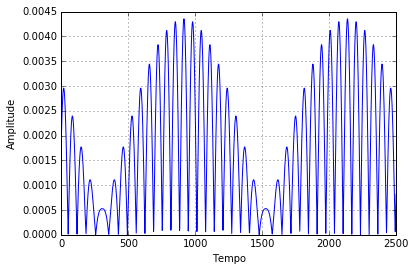

In [121]:
# N = Numéro de Amostras
# T = 1/f = Período

N = 4096
T = 1.0 / 5000.0
x = np.linspace(0.0, N*T, N)
y = 5*np.sin(3*np.pi*(30*x) ) + 3.92*np.cos(2*np.pi*(50*x))

xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
plot.plot(xf, 2.0/N * np.abs(y[0:N/2]))
print("Série de Fourier: ")
plot.grid()
plot.xlabel('Tempo')
plot.ylabel('Amplitude')
plot.show()


In [122]:
#Definindo a Função discreta de Fourier
def DFT_slow(x):
    x = np.asarray(x, dtype = float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N,1))
    M = np.exp(-2j*  np.pi *k *n / N)
    return np.dot(M, x)

In [123]:
#Definindo a função FFT
def FFT(x):
    x = np.asarray(x, dtype = float)
    N = x.shape[0]
    
    if N % 2 > 0:
        raise ValueError("Tamanho de X deve ser na ordem de elevado a 2")
    elif N <= 32:
        return DFT_slow(x)
    else:
        X_pares = FFT(x[::2])
        X_impares = FFT(x[1::2])
        fator = np.exp(-2j* np.pi * np.arange(N) / N)
        total = np.concatenate([X_pares + fator[:N / 2] * X_impares, X_pares + fator[N / 2:] * X_impares])
        return total


In [124]:
def IFFT(x):
    N = x.shape[0]
    return (1/N)*FFT(x)

In [125]:
#Testando o tempo das funções

x = np.random.random(4096)
np.allclose(DFT_slow(x), np.fft.fft(x))
np.allclose(FFT(x), np.fft.fft(x))
np.allclose(IFFT(x), np.fft.ifft(x))

%timeit DFT_slow(x)
%timeit FFT(x)
%timeit IFFT(x)
%timeit np.fft.fft(x)

1 loop, best of 3: 1.81 s per loop
10 loops, best of 3: 23.6 ms per loop
10 loops, best of 3: 24.3 ms per loop
10000 loops, best of 3: 88.3 µs per loop


Podemos observar então que existe uma grande diferença entre o tempo de execução da Transformada Discreta de Fourier em relação ao seu algoritmo da Transformada Rápida de Fourier. 

## 5. Utilizando Bibliotecas

Agora iremos utilizar bibliotecas pré-definidas (Scipy, Numpy e PyFFTW) para implementar os mesmos cálculos sobre a sequência **_x(n)_**, levando em observação o tempo de execução de cada operação.

### 5.1 Scipy



Biblioteca Scipy 
Transformada Rápida de Fourier (FFT): 
Tempo de compilação: 0.056037187576293945 segundos


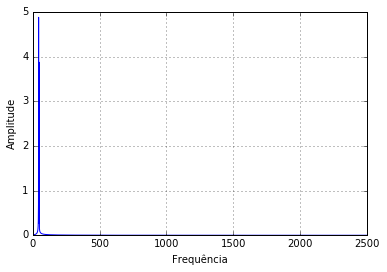

In [126]:
#Para a Scipy FFT
startTime = time.time()
N = 4096
T = 1.0/ 5000.0
x = sc.linspace(0.0, N*T, N)
y = 5*sc.sin(3*sc.pi*(30*x) ) + 3.92*sc.cos(2*sc.pi*(50*x))

xFourier_sc = sc.linspace(0.0, 1.0/(2.0*T), N/2)
yFourier_sc = sc.fft(y)

plot.plot(xFourier_sc, 2.0/N * np.abs(yFourier_sc[0:N/2]))
regTime_sc_FFT = time.time() - startTime
print("Biblioteca Scipy \nTransformada Rápida de Fourier (FFT): ")
print("Tempo de compilação: %s segundos" % regTime_sc_FFT)
plot.grid()
plot.xlabel('Frequência')
plot.ylabel('Amplitude')
plot.show()

Biblioteca Scipy 
Inversa da Transformada Rápida de Fourier (IFFT): 
Tempo de compilação: 0.053038835525512695 segundos


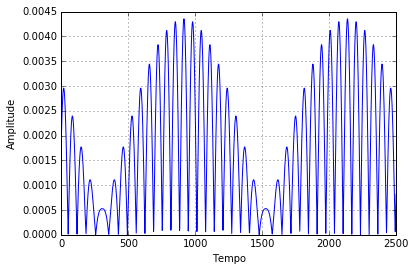

In [127]:
#Para Scipy IFFT
startTime = time.time() #Iniciando contagem do tempo

xIFourier_sc = xFourier_sc
yIFourier_sc = sc.ifft(yFourier_sc)

plot.plot(xIFourier_sc, 2.0/N * np.abs(yIFourier_sc[0:N/2]))
regTime_sc_IFFT = time.time() - startTime
print("Biblioteca Scipy \nInversa da Transformada Rápida de Fourier (IFFT): ")
print("Tempo de compilação: %s segundos" % regTime_sc_IFFT)
plot.grid()
plot.xlabel('Tempo')
plot.ylabel('Amplitude')
plot.show()


### 5.2 Numpy

Biblioteca Numpy 
Transformada Rápida de Fourier (FFT): 
Tempo de compilação: 0.052034616470336914 segundos


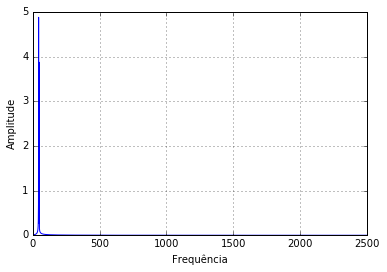

In [128]:
#Para a Numpy FFT
startTime = time.time()
N = 4096
T = 1.0/5000.0
x = np.linspace(0.0, N*T, N)
y = 5*np.sin(3*np.pi*(30*x) ) + 3.92*np.cos(2*np.pi*(50*x))

xFourier_np = np.linspace(0.0, 1.0/(2.0*T), N/2)
yFourier_np = np.fft.fft(y)

plot.plot(xFourier_np, 2.0/N * np.abs(yFourier_np[0:N/2]))
regTime_np_FFT = time.time() - startTime
print("Biblioteca Numpy \nTransformada Rápida de Fourier (FFT): ")
print("Tempo de compilação: %s segundos" % regTime_np_FFT)
plot.grid()
plot.xlabel('Frequência')
plot.ylabel('Amplitude')
plot.show()

Biblioteca Numpy 
Inversa da Transformada Rápida de Fourier (IFFT): 
Tempo de compilação: 0.05303502082824707 segundos


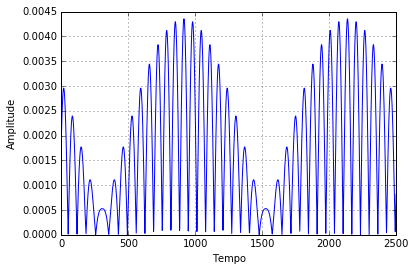

In [129]:
#Para a Numpy IFFT
startTime = time.time() #Iniciando contagem do tempo

xIFourier_np = xFourier_np
yIFourier_np = np.fft.ifft(yFourier_np)

plot.plot(xIFourier_np, 2.0/N * np.abs(yIFourier_np[0:N/2]))
regTime_np_IFFT = time.time() - startTime
print("Biblioteca Numpy \nInversa da Transformada Rápida de Fourier (IFFT): ")
print("Tempo de compilação: %s segundos" % regTime_np_IFFT)
plot.grid()
plot.xlabel('Tempo')
plot.ylabel('Amplitude')
plot.show()

### 5.3 PyFFTW

Nesse exemplo utilizaremos uma equação randômica, podemos observar a maior velocidade de compilação da FFT e da IFFT em relação as outras duas bibliotecas observadas : Numpy e Scipy.

In [130]:
N = 4096

a = pyfftw.empty_aligned(N, dtype = 'float64')
a[:] = np.random.randn(N) + 1j*np.random.randn(N)
b = pyfftw.empty_aligned(N//2 + 1, 'complex128')


startTime = time.time()
foward = pyfftw.FFTW(a, b, threads=os.cpu_count(), direction ='FFTW_FORWARD')
time1 = time.time() - startTime
if (time1 <= 0.009):
    print("Biblioteca PyFFTW \nTransformada Rápida de Fourier (FFT): ")
    print("Tempo de compilação: Aproximadamente 0.01 segundos")
    regTime_pyFFTW_foward = str(0.01)
else:
    print("Biblioteca PyFFTW \nTransformada Rápida de Fourier (FFT): ")
    print("Tempo de compilação: %s segundos" % time1)
    regTime_pyFFTW_foward = time1

backward =  pyfftw.FFTW(b, a, threads=os.cpu_count(), direction='FFTW_BACKWARD')
time2 = time.time() - startTime
if (time2 <= 0.009):
    print("\n\nBiblioteca PyFFTW \nInversa da Transformada Rápida de Fourier (IFFT): ")
    print("Tempo de compilação: Aproximadamente 0.01 segundos")
    regTime_pyFFTW_backward = str(0.01)
else:   
    print("\n\nBiblioteca PyFFTW \nInversa da Transformada Rápida de Fourier (IFFT): ")
    print("Tempo de compilação: %s segundos" % time2)
    regTime_pyFFTW_backward = time2

Biblioteca PyFFTW 
Transformada Rápida de Fourier (FFT): 
Tempo de compilação: Aproximadamente 0.01 segundos


Biblioteca PyFFTW 
Inversa da Transformada Rápida de Fourier (IFFT): 
Tempo de compilação: Aproximadamente 0.01 segundos


## 6. Tabela

In [131]:
from tabulate import tabulate as tb

table = [["Scipy - FFT", regTime_sc_FFT], ["Numpy - FFT", regTime_np_FFT], ["PyFFTW - FFT", regTime_pyFFTW_foward],
         ["Scipy - IFFT", regTime_sc_IFFT], ["Numpy - IFFT", regTime_np_IFFT], ["PyFFTW - IFFT", regTime_pyFFTW_backward]]
headers = ["Biblioteca Usada", "Tempo de compilação (segundos)"]
print(tb(table, headers, tablefmt="grid"))

+--------------------+----------------------------------+
| Biblioteca Usada   |   Tempo de compilação (segundos) |
+====================+==================================+
| Scipy - FFT        |                        0.0560372 |
+--------------------+----------------------------------+
| Numpy - FFT        |                        0.0520346 |
+--------------------+----------------------------------+
| PyFFTW - FFT       |                        0.01      |
+--------------------+----------------------------------+
| Scipy - IFFT       |                        0.0530388 |
+--------------------+----------------------------------+
| Numpy - IFFT       |                        0.053035  |
+--------------------+----------------------------------+
| PyFFTW - IFFT      |                        0.01      |
+--------------------+----------------------------------+


## 7. Referências

Agradecimentos aos colegas de turma : Braga, Johnathan S. ; Souza, Elitelma S.

https://jakevdp.github.io/blog/2013/08/28/understanding-the-fft/

http://forrestbao.blogspot.com.br/2014/07/signal-filtering-using-inverse-fft-in.html

http://stackoverflow.com/questions/16715641/inverse-of-fft-not-the-same-as-original-function

http://stackoverflow.com/questions/25735153/plotting-a-fast-fourier-transform-in-python

http://stackoverflow.com/questions/28227314/using-pyfftw-properly-for-speed-up-over-numpy

http://www2.math.ethz.ch/education/bachelor/seminars/fs2008/nas/woerner.pdf

https://hgomersall.github.io/pyFFTW/sphinx/tutorial.html

https://hgomersall.github.io/pyFFTW/pyfftw/pyfftw.html#module-pyfftw